# DATA 620 Assignment- High Frequency Words 

### Import Packages

In [ ]:
# Packages used

import string
import re
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1:  Choose corpus of interest

In [ ]:
import nltk   
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()


#### How many words are in the selected corpus?

In [63]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print("There are:",len(emma),"words in the corpus of interest")

There are: 192427 words in the corpus of interest


### Question 2: How many total unique words are in the corpus?

Remove puntuation marks so thst these are not counted.

In [64]:
exclude = list(string.punctuation + string.ascii_letters)
exclude.extend(['...', '[...', '\'?', '\'!', '\'.', '\',', '?!', 
                '--...', '...?', '--', '\'...', '...]', '.)',
                '..', '.\'', ',--', '!]', '!)', '!,', ',\'', ';--','.\"'])

trimmed_text = [x for x in emma if x not in exclude]

len(set(trimmed_text))

7769

In [61]:
trimmed_text = [x.lower() for x in trimmed_text]

In [62]:
len(set(trimmed_text))

7305

There are 7305 unique words.

### Question 2: Taking the most common words, how many unique words represent half of the total words in the corpus ?

In [66]:
from nltk import FreqDist
fdist = FreqDist(trimmed_text)

In [67]:

fdist_df = pd.DataFrame.from_dict(sorted(fdist.items(), 
                                   key=operator.itemgetter(1), 
                                   reverse=True))
fdist_df.columns = ['Word','Frequency']
fdist_df.head(5)

,Word,Frequency
0,to,5183
1,the,4844
2,and,4672
3,of,4279
4,was,2385


In [68]:
print(fdist)

<FreqDist with 7769 samples and 157114 outcomes>


In [71]:
total = 0
index = 0
while total <= 164683/2:
    total += fdist_df.Frequency.iloc[index]
    index += 1

print("\nAnswer:\n")
print("{} unique words make up nearly half of the total words in the corpus.".format(index-1))
print("These 84 unique words make up {:,} out of 157114 total words in the corpus.".format(total) )


Answer:

84 unique words make up nearly half of the total words in the corpus.
These 84 unique words make up 82,482 out of 157114 total words in the corpus.


### 4. Identify the 200 highest frequency words in this corpus

Below is a table which lists the 200 highest frequency words in descending order.

In [ ]:
top_200 = fdist_df.head(200)
top_200

### Question 5: Create a graph that shows the relative frequency of these 200 words

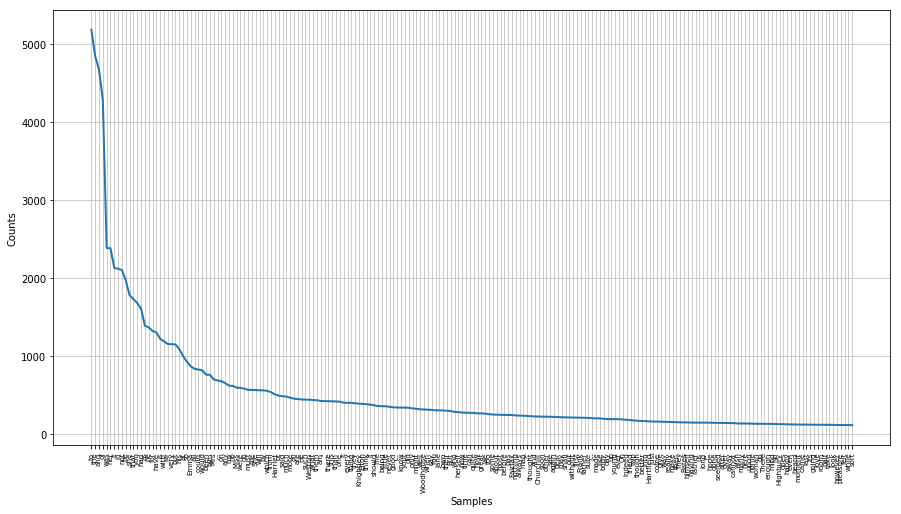

In [73]:
plt.figure(figsize=(15, 8))
plt.rc('xtick', labelsize=7) 
fdist.plot(200)


### 6. Does the observed relative frequency of those words follow Zipf's law?

Zipf’s Law is a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequencies of certain words are inversely proportional to their ranks. Named for linguist George Kingsley Zipf, who around 1935 was the first to draw attention to this phenomenon, the law examines the frequency of words in natural language and how the most common word occurs twice as often as the second most frequent word, three times as often as the subsequent word and so on until the least frequent word. The word in the position n appears 1/n times as often as the most frequent one.

When words are ranked according to their frequencies in a large enough collection of texts and then the frequency is plotted against the rank, the result is a logarithmic curve. (Or if you graph on a log scale, the result is a straight line.)(https://whatis.techtarget.com/definition/Zipfs-Law)

In this case, the most commonly used words occur at a much higher frequency than the next . This gives the curved graph that we see above. I would thus say that the to some extent, the observed relative frequency follow Zipf's law.


### 7. In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Frequency of common words may vary according to word counts in other individual corpora. However, i think the pattern of relative frequency of common words in this corpora will be somewhat similar to that in others.